<a href="https://colab.research.google.com/github/myller-silva/explications-anns-colab/blob/main/Plotagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import ast
import numpy as np
import pandas as pd
import tensorflow as tf
from typing import List, Tuple
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import matplotlib.patches as patches

In [101]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/My Drive/explications-anns'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
datasets_path = f'{base_path}/datasets'
results_path = f'{datasets_path}/digits/results'

In [103]:
def read_dataset(dir_path:str, model_h5_file:str):
  data_test = pd.read_csv(f"{dir_path}/test.csv")
  data_train = pd.read_csv(f"{dir_path}/train.csv")
  data = data_train._append(data_test)

  model_h5 = tf.keras.models.load_model(f"{dir_path}/{model_h5_file}")
  return (data, model_h5)

In [125]:
model_h5_file = 'models/model_1layers_20neurons.h5'
(data, model_h5) = read_dataset(f'{datasets_path}/digits', model_h5_file)

In [126]:
result_df = pd.read_csv(f'{results_path}/{model_h5_file}/df.csv')
result_df = result_df[(result_df["len_relaxado"] != 64) | (result_df["len_relaxado_global"] != 64)]
result_df

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
0,0,1.215206,0.697083,0.640992,43,35,33,0.7,"[(0, 5), (1, 0), (1, 4), (2, 0), (2, 1), (2, 2...","[(2, 3), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3...","[(2, 3), (2, 4), (2, 6), (2, 7), (3, 0), (3, 1..."
1,1,3.864563,1.268603,0.989026,43,35,36,0.7,"[(0, 6), (2, 2), (2, 4), (2, 5), (2, 6), (2, 7...","[(2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3...","[(2, 2), (2, 3), (2, 5), (2, 6), (2, 7), (3, 0..."
2,2,1.398323,0.580118,0.615615,44,26,29,0.7,"[(1, 1), (1, 2), (1, 4), (1, 6), (1, 7), (2, 0...","[(3, 4), (3, 5), (3, 6), (4, 2), (4, 3), (4, 5...","[(3, 1), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1..."
3,3,1.277844,0.632168,0.516006,44,32,33,0.7,"[(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4...","[(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5...","[(2, 5), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3..."
4,4,1.519074,0.954398,1.448342,46,32,35,0.7,"[(0, 5), (0, 6), (0, 7), (1, 1), (1, 2), (1, 4...","[(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7...","[(1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
5,5,2.622327,2.164436,1.117319,44,33,41,0.7,"[(1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1...","[(2, 4), (2, 5), (3, 0), (3, 2), (3, 3), (3, 4...","[(1, 3), (1, 4), (1, 5), (2, 1), (2, 4), (2, 5..."
6,6,1.557531,0.670375,0.658623,44,34,33,0.7,"[(0, 4), (0, 5), (0, 6), (1, 1), (1, 2), (1, 3...","[(2, 1), (2, 4), (3, 2), (3, 3), (3, 4), (3, 6...","[(1, 6), (2, 1), (2, 4), (3, 1), (3, 2), (3, 3..."
7,7,2.340975,0.670640,1.152009,40,29,39,0.7,"[(0, 2), (0, 5), (0, 6), (1, 1), (1, 4), (1, 5...","[(2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 5...","[(1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3..."
8,8,2.793556,1.019686,0.995635,40,38,39,0.7,"[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5...","[(1, 1), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7...","[(1, 0), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7..."


In [127]:
def string_to_list(string):
    return ast.literal_eval(string)

In [128]:
def not_in_explanation(explanation: List[Tuple[int, int]], dimension: Tuple[int, int] = (8, 8)):
  x, y = dimension
  array = []
  for i in range(x):
    for j in range(y):
      if (i, j) not in explanation:
        array.append((i, j))
  return array

In [129]:
def show_image_with_explanation(ax, df: pd.DataFrame, instancia_index: int, explanation: list, explanation_name: str):
    instancia_values = df.iloc[instancia_index, :-1].values
    instancia = instancia_values.reshape(8, 8)

    ax.imshow(instancia, cmap="gray")

    target = df.iloc[instancia_index, -1]

    ax.text(0.5, -0.1, f"Target: {target}", fontsize=12, ha="center", transform=ax.transAxes )

    not_in_exp = not_in_explanation(explanation, (8, 8))
    for i, j in not_in_exp:
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor="r", facecolor="r", alpha=1)
        ax.add_patch(rect)

    # Adicionar texto com o nome da explicação e quantidade de pixels
    ax.text(0.5, 1.05,f"{explanation_name} ({len(explanation)} pixels)",fontsize=12,ha="center",transform=ax.transAxes)


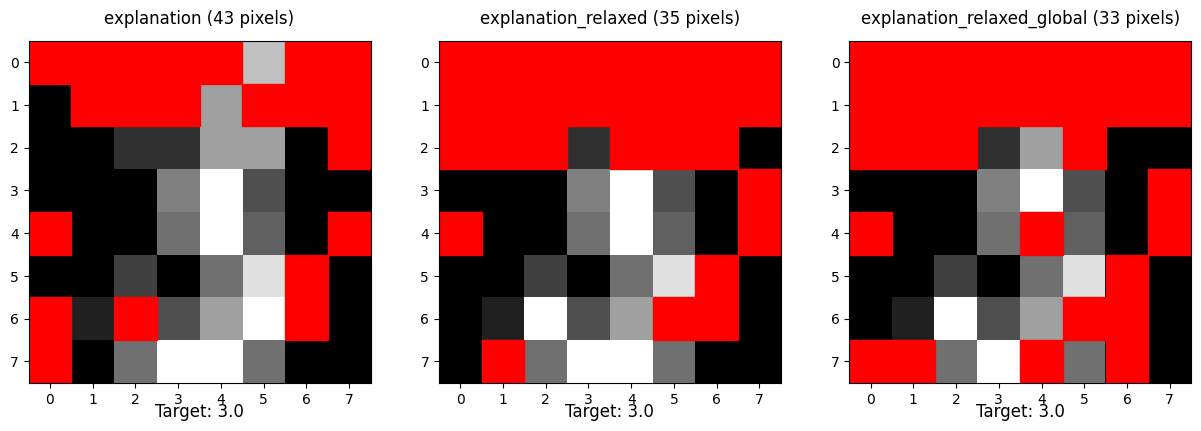

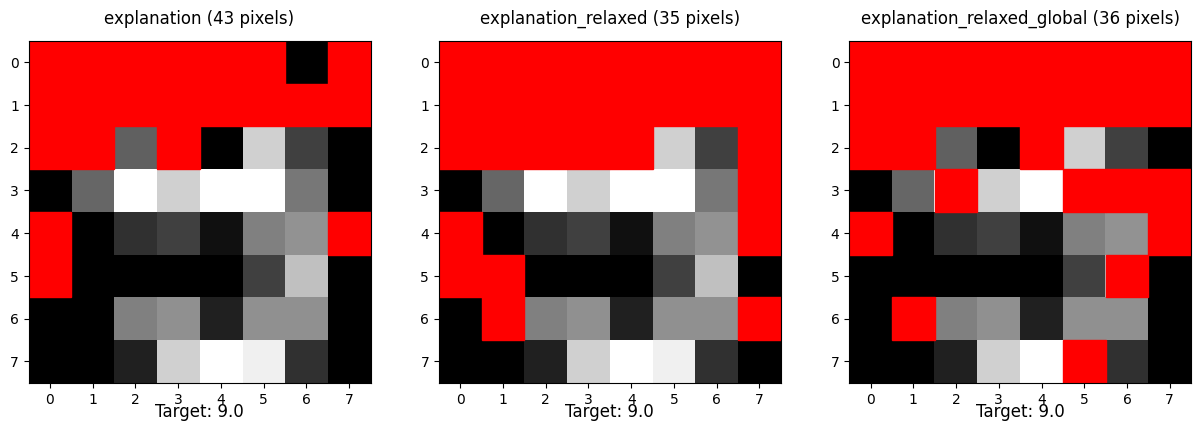

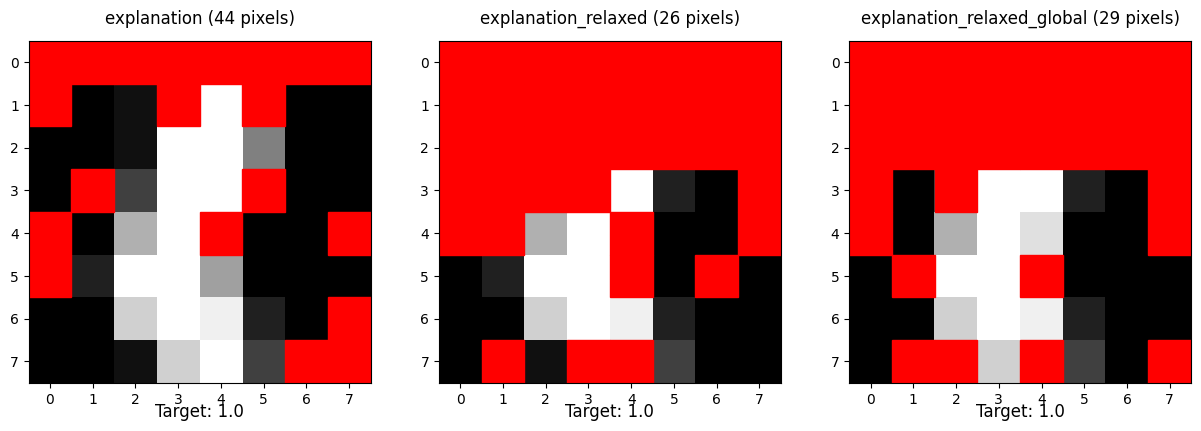

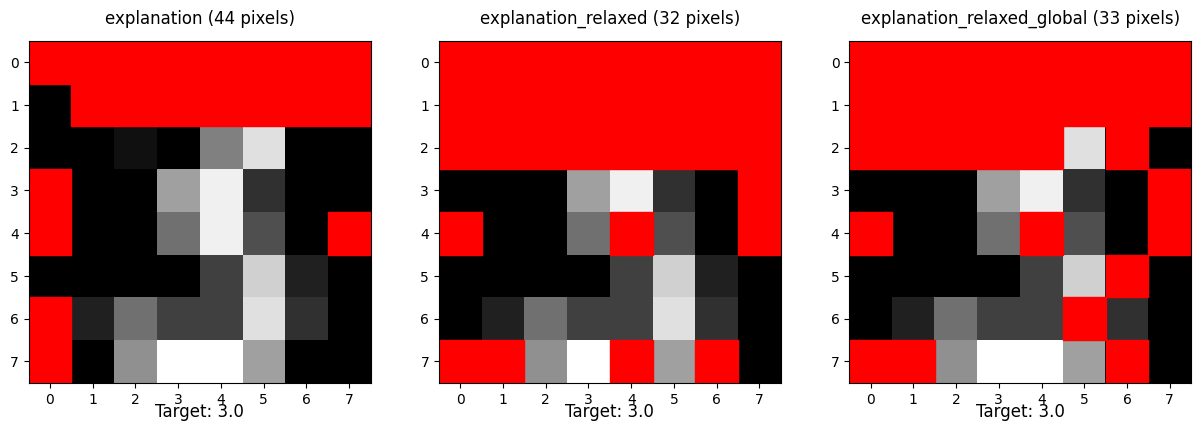

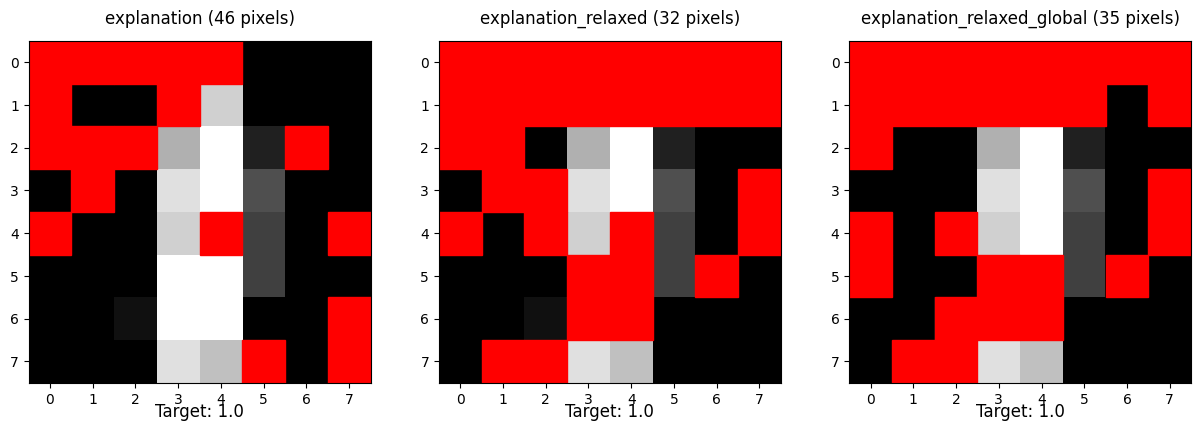

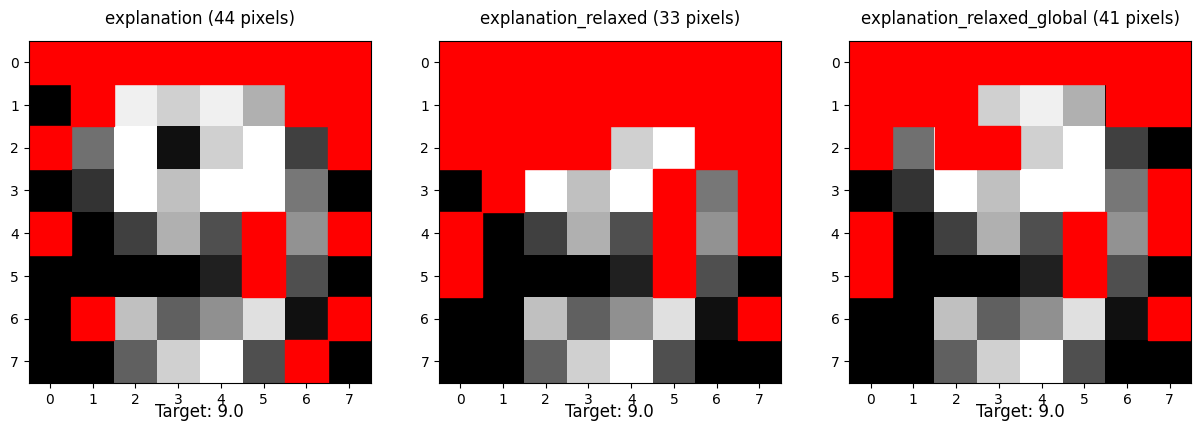

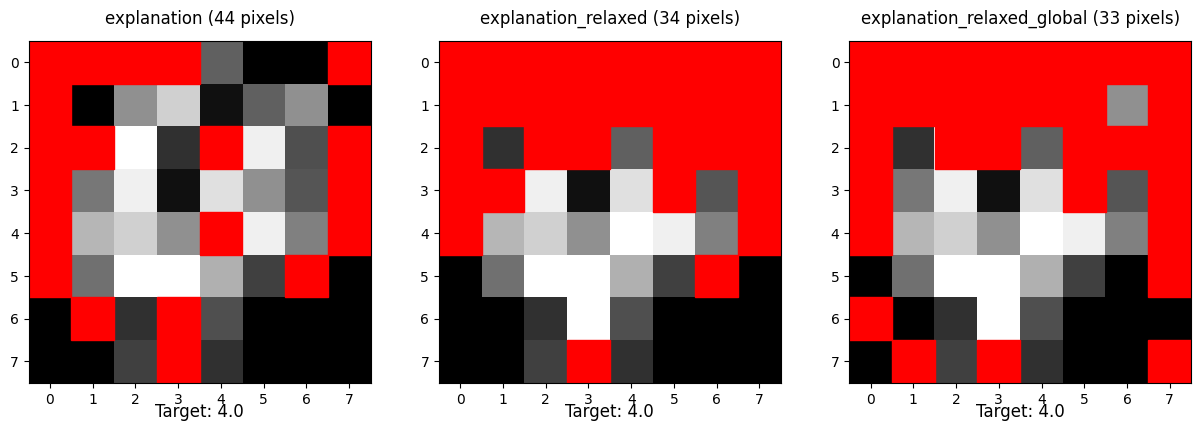

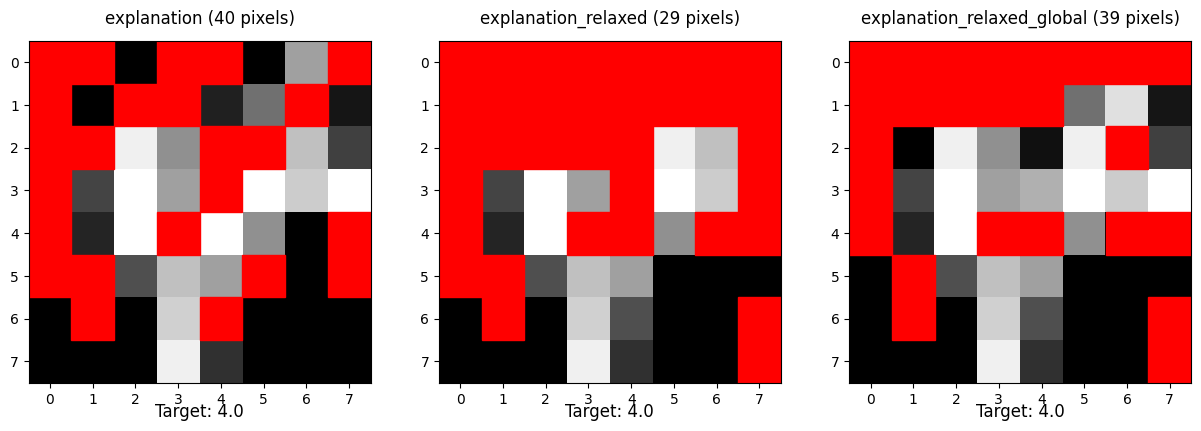

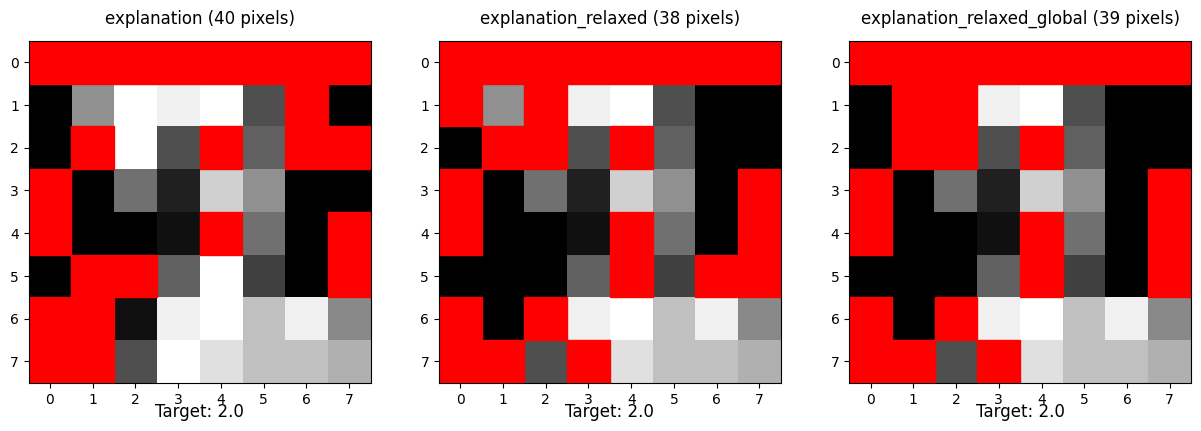

In [130]:
for index in range(len(result_df)):
    explanation_names = ["explanation", "explanation_relaxed", "explanation_relaxed_global"]
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axs):
        explanation_name = explanation_names[i]
        explanation_data = result_df.iloc[index][explanation_name]
        if pd.isna(explanation_data):
            ax.text(0.5, 0.5, "NAN", fontsize=12, ha="center")
            ax.axis('off')  # Desativar os eixos do gráfico
        else:
            show_image_with_explanation(
                ax, data, index,
                string_to_list(explanation_data),
                explanation_name
            )
    plt.show()


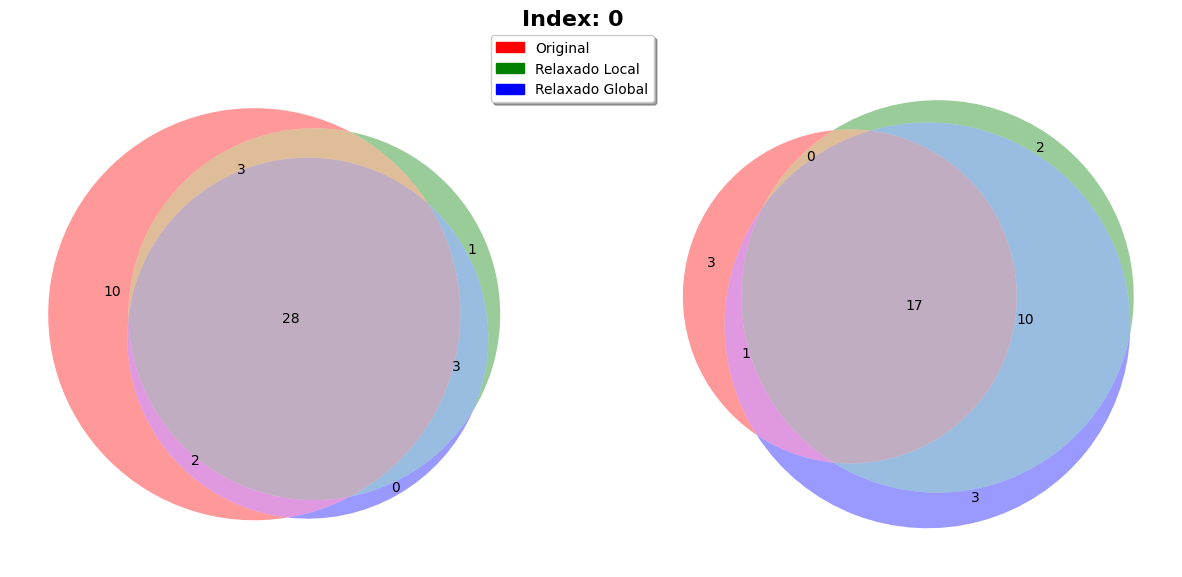

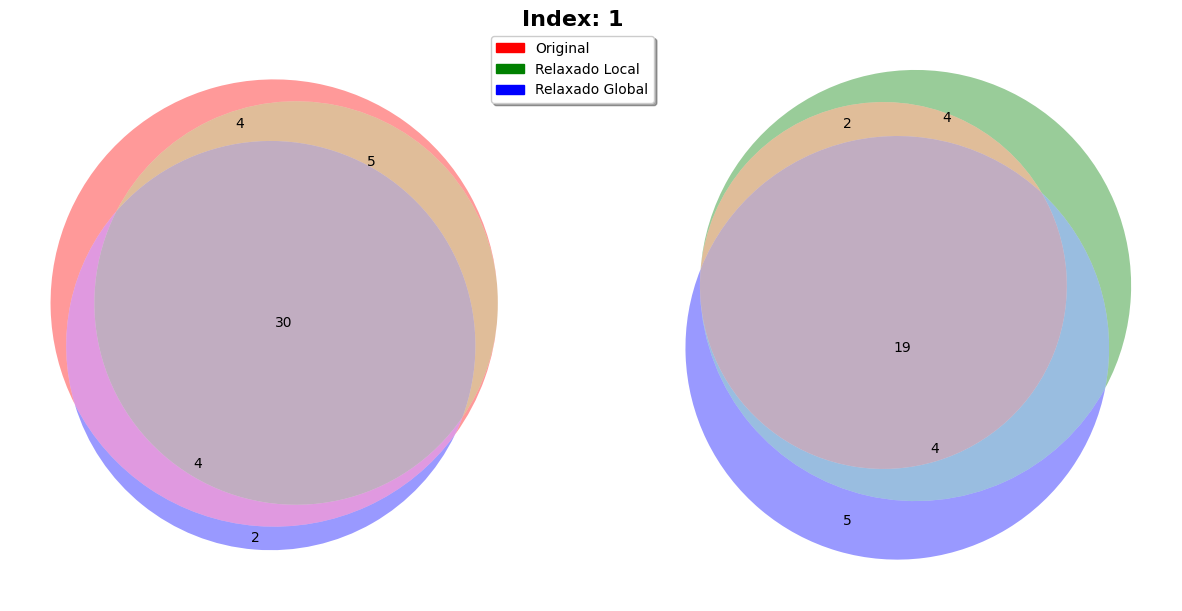

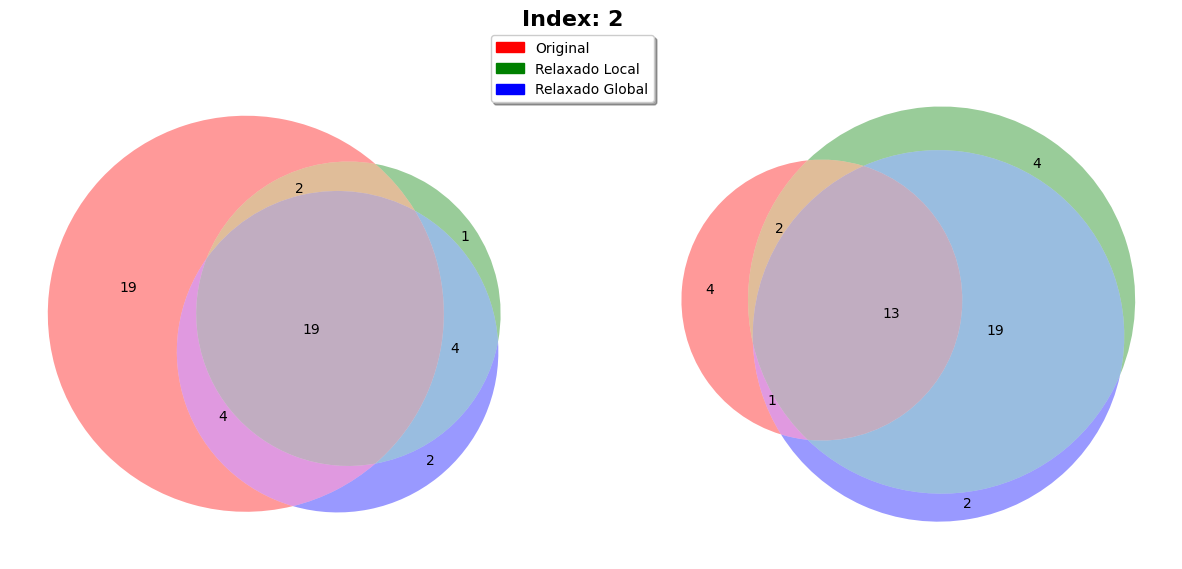

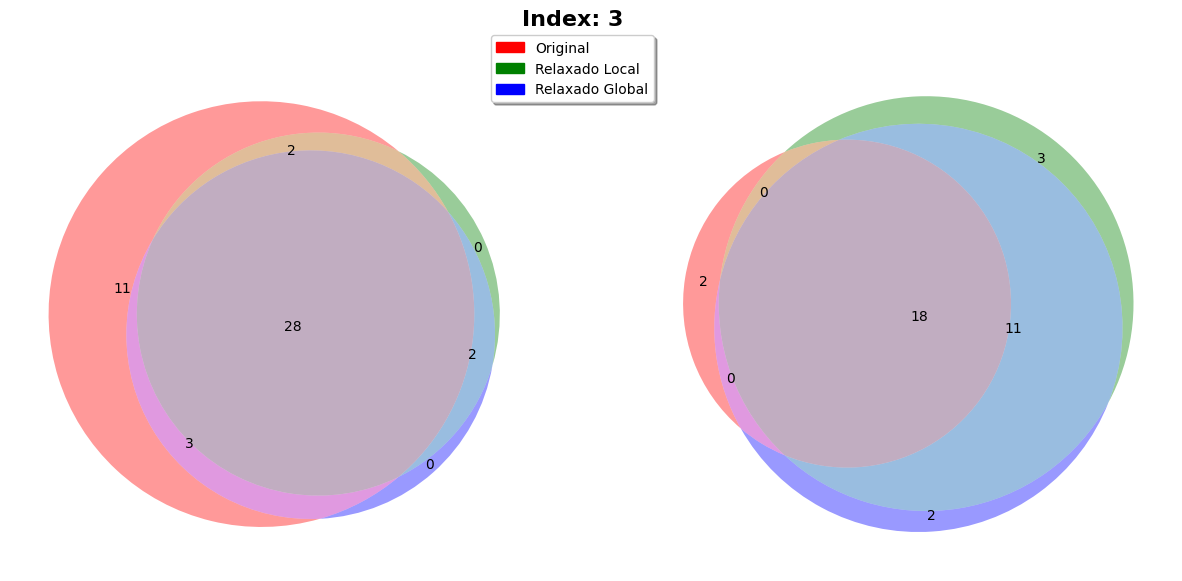

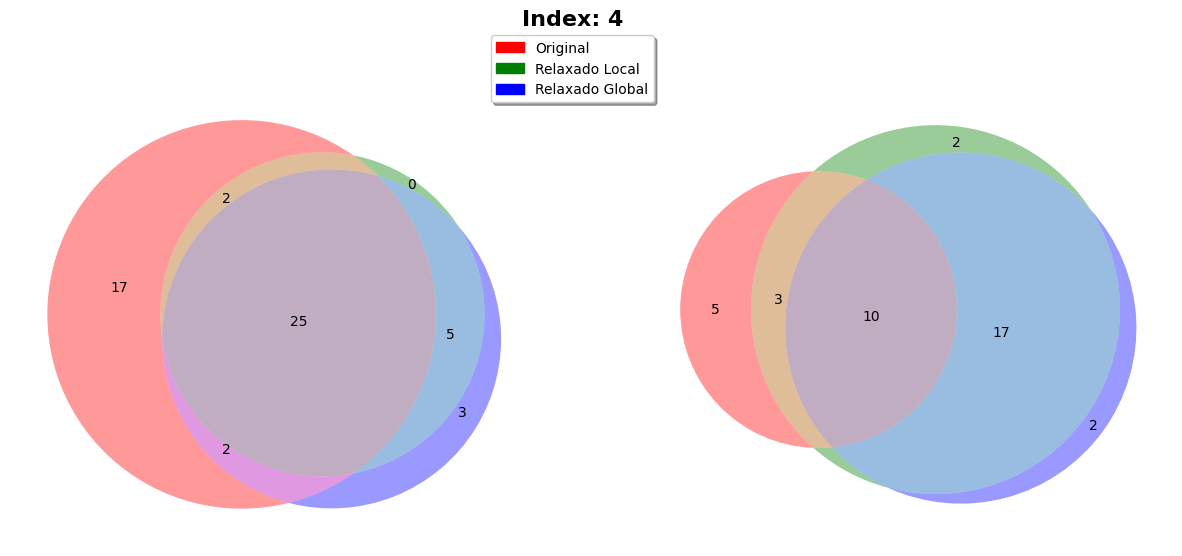

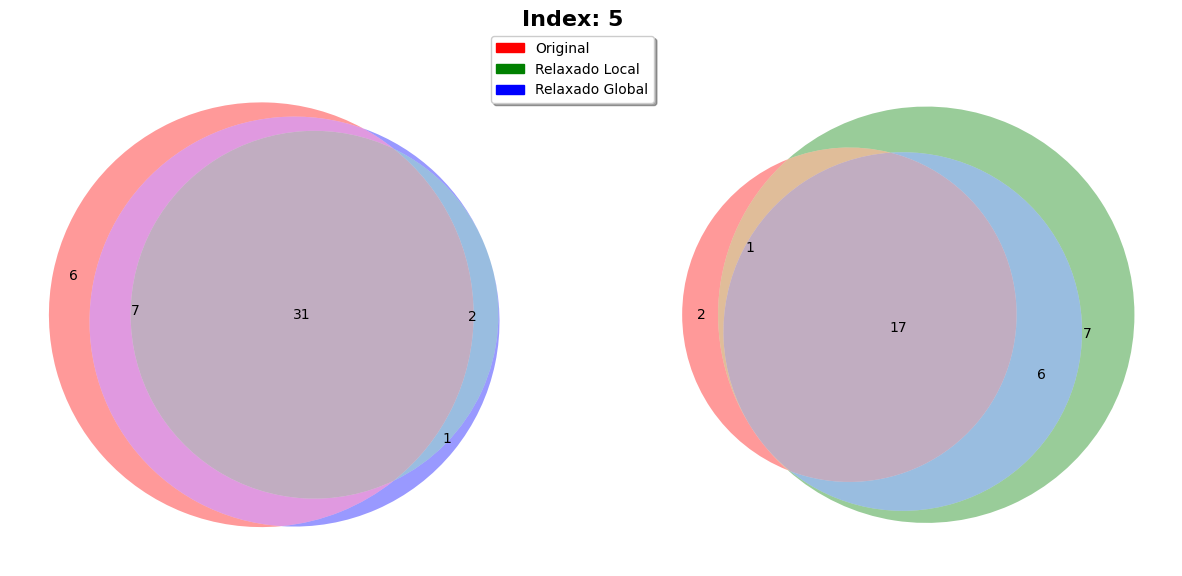

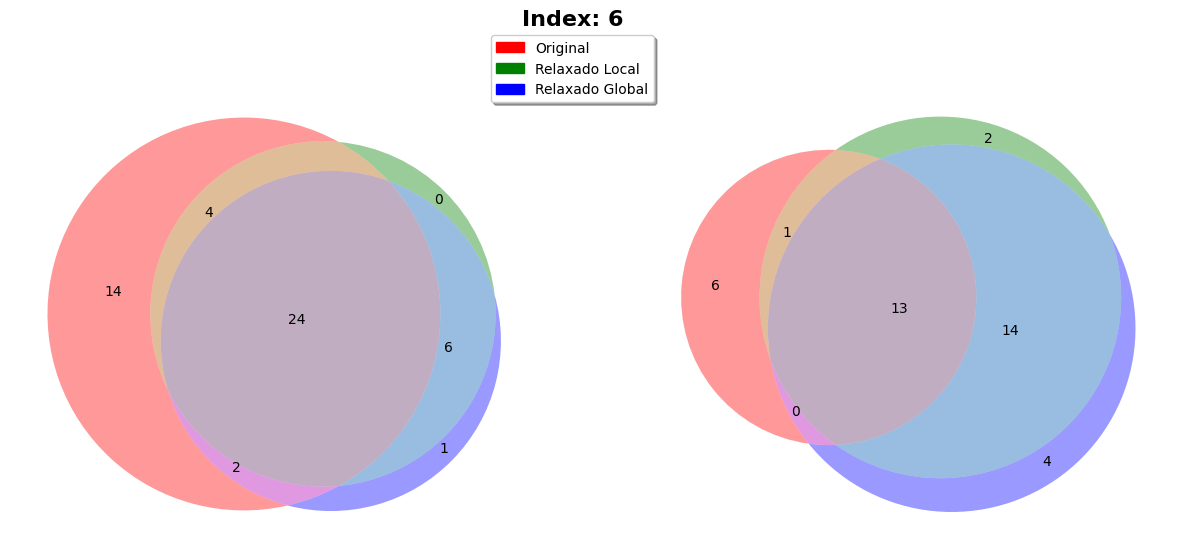

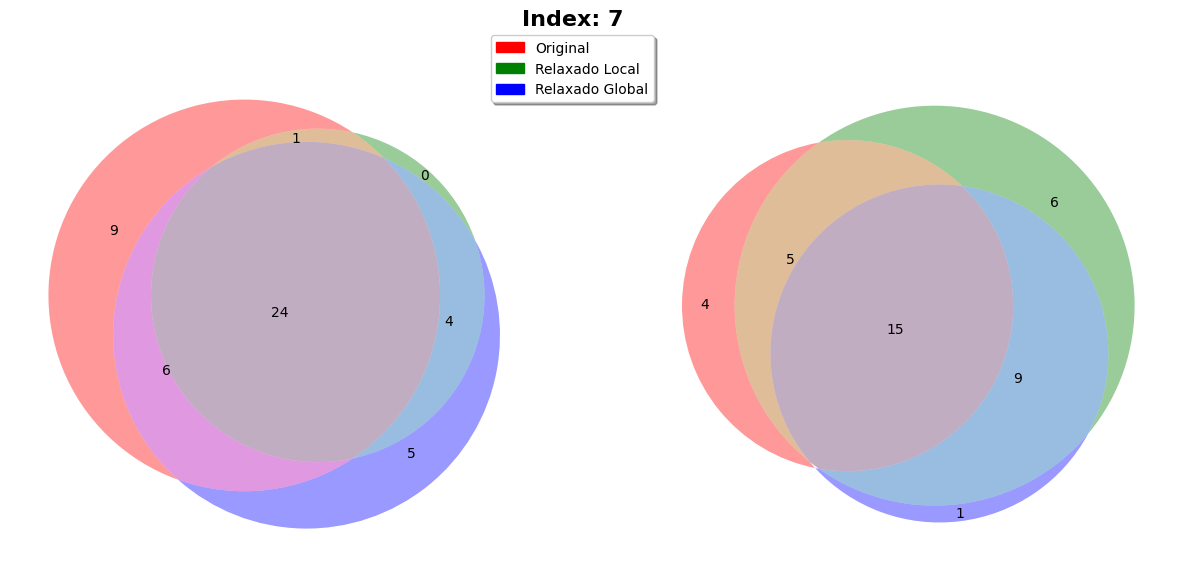

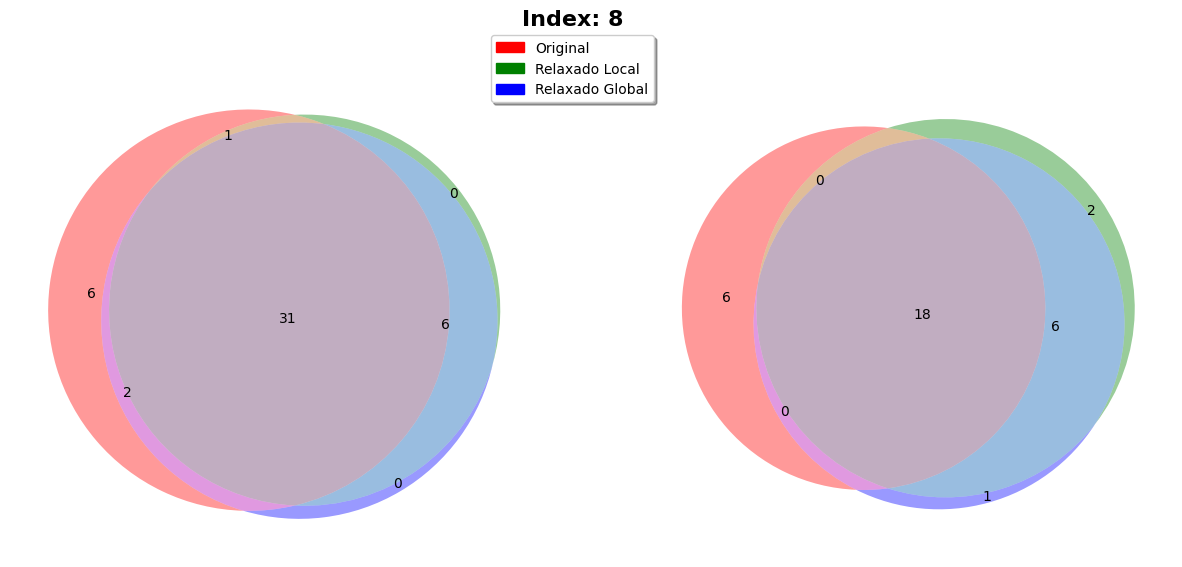

In [161]:
import matplotlib.patches as mpatches
for index in range(len(result_df)):
    explanation = result_df.iloc[index]["explanation"]
    explanation_relaxed = result_df.iloc[index]["explanation_relaxed"]
    explanation_relaxed_global = result_df.iloc[index]["explanation_relaxed_global"]

    subsets, subsets_notna, legends = [], [], []
    set_colors = []
    if pd.notna(explanation):
        exp = string_to_list(explanation)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(mpatches.Patch(color='red', label='Original'))
        set_colors.append('red')

    if pd.notna(explanation_relaxed):
        exp = string_to_list(explanation_relaxed)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(mpatches.Patch(color='green', label='Relaxado Local'))
        set_colors.append('green')

    if pd.notna(explanation_relaxed_global):
        exp = string_to_list(explanation_relaxed_global)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(mpatches.Patch(color='blue', label='Relaxado Global'))
        set_colors.append('blue')

    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    for i, ax in enumerate(axs):
        if i == 0:
            venn3(subsets,None, set_colors=set_colors, ax=ax)
        else:
            venn3(subsets_notna, None, set_colors=set_colors, ax=ax)

    # Adicionar título ao gráfico
    fig.suptitle(f'Index: {index}', fontsize=16, fontweight='bold', y = 0.8)
    fig.legend(handles = legends, loc='lower center', bbox_to_anchor=(0.5, 0.7), fancybox=True, shadow=True, ncol=1)
    plt.show()
